# Content and structure of a Tracab TF05 XML file
Tracab TF05 XML files contain summary match data, like team names, player names, match date, but the heatmaps make up bulk of the information. These heatmaps summarize  the pitch locations where teams and individual players have been present. This information can form part of pre- and post-match analysis reports, or general opponent research. The first few lines of a Tracab TF05 XML file look like this:

![TF05 snippet](./img/tf05_xml_screenshot.PNG)

Diferent types of heatmaps provide team-level and player-level information: 
## Combined team heatmaps
* __Overall:__ combined team heatmap, over the entire match duration
* __Defence:__ combined heatmap of the team defenders
* __Midfield:__ combined ehatmap of the team midfielders
* __Attack:__ combined heatmap of the team attackers.

Unfortunately, the Tracab TF05 feed does not tell us the players who are part of the defence, midfield, and attack heatmaps, so we are left with just an intuitive notion of which players contribute to which heatmap. On the positive side, we have access to team heatmaps separated by phases of the game (in/out of possession) and by period (first half, second helf):  

* __In possession or out of possession__. For each of these two phases, we have these combined team heatmaps: 
  * Overall
  * First half
  * Second half

## Individual player heatmaps
Similar to the combined team heatmaps, possession heatmaps are available for each player, in addition to the player's overall heatmap. First-half and second-half heatmaps are not available for individual players.
* __Overall:__ a player's overall heatmap for the entire match duration.
* __In possession or out of possession__. For each of these two phases, we have these player heatmaps:
  - Overall
  - First half
  - Second half
  
## Structure of a heatmap
A heatmap in a Tracab TF05 feed is represented as a long string of 240 character digits, each digit an integer between 0-9. These 240 digits are associated with 240 pitch locations, and the corresponding integers represent the time a team (or a player) spent in that location. The numbers 0-9 are normalized time values, where 0 means "no time" and 9 means "maximum time." Unfortunately, I do not know the normaalization applied to the time spent in each location, so I cannot say what "maximum time" means. For this reason, a safe approach to interpreting these numbers is to view them only in relation to the rest of the same heatmap, and not relative to other heatmaps. So for example, I cannot tell if a "9" from player X represents the same absolute length of time as a "9" for player Y, but I am sure that for player X a "9" means more time spent in a particular location than a "4". Here's what a heatmap tag looks like in the XML feed:
![tf05 heatmap tag](img/tf05_xml_heatmap_string.png)

The 240 character digits map to a 24x20 matrix overlaid on the pitch, with the top left corner corrsponding to the first digit, and the bottom right corner to the last. Here's a snapshot from Tracab's documentation, which however __is incorrect!__ The documentation states that heatmaps are made of 200 digits (20x10), but I found out the hard way that it's actullally 240. Nonetheless, the figure below gives you the general idea. Note that all heatmaps assume that the attacking direction is left-to-right, irrespective of the actual attacking direction during the match. In other words, all heatmaps have been standardized on a left-to-right attacking reference. 

![tracab heatmap_overlay](img/tracab_heatmap.png)

In [49]:
#import sys
#sys.path.append("/home/luca/projects/tfutils")
import tfutils
import importlib
importlib.reload(tfutils) # for picking up changes to source code

In [57]:
import pandas as pd

In [51]:
fname = '/home/luca/projects/morocco-wc-project2/data/TRACKING DATA_2021206_SYR-MTN/129650_TF05_PMS.xml'
source = tfutils.TracabTf05Xml(fname)

In [52]:
source.parse()

In [53]:
source.summary()

Source file: /home/luca/projects/morocco-wc-project2/data/TRACKING DATA_2021206_SYR-MTN/129650_TF05_PMS.xml
Home team name and ID:Syria, 43838
Away team name and ID: Mauritania, 43870
Match date: 2021-12-06 18:00:00
Match ID: 129650
Match duration: 98.614 minutes


In [54]:
# Get the players on a team
source.get_team_players('home')

{'id': ['433934',
  '400835',
  '390282',
  '424897',
  '433831',
  '349348',
  '397757',
  '433827',
  '400836',
  '433935',
  '433826',
  '390301',
  '431754',
  '433842',
  '433941',
  '346855'],
 'jersey': ['5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '18',
  '19',
  '20',
  '23'],
 'name': ['Yousef MOHAMMAD',
  'Amro JENIAT',
  'Mohammad ALHALLAK',
  'Ward ALSLAMH',
  'Ali BASHMANI',
  'Mahmoud AL MAWAS',
  'Mahmood ALBAHER',
  'Mohammed OSMAN',
  'Thaer KROUMA',
  'Mohamad RIHANIEH',
  'Mohammed SAHYOUNI',
  'Kamel HMEISHEH',
  'Mohammad ANEZ',
  'Moaiad ALKHOULI',
  'Oliver Isak KASS KAWO',
  'Khaled ALHAJI OTHMAN']}

In [55]:
# You can also use the actual team name ...
source.get_team_players('Syria')

{'id': ['433934',
  '400835',
  '390282',
  '424897',
  '433831',
  '349348',
  '397757',
  '433827',
  '400836',
  '433935',
  '433826',
  '390301',
  '431754',
  '433842',
  '433941',
  '346855'],
 'jersey': ['5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '18',
  '19',
  '20',
  '23'],
 'name': ['Yousef MOHAMMAD',
  'Amro JENIAT',
  'Mohammad ALHALLAK',
  'Ward ALSLAMH',
  'Ali BASHMANI',
  'Mahmoud AL MAWAS',
  'Mahmood ALBAHER',
  'Mohammed OSMAN',
  'Thaer KROUMA',
  'Mohamad RIHANIEH',
  'Mohammed SAHYOUNI',
  'Kamel HMEISHEH',
  'Mohammad ANEZ',
  'Moaiad ALKHOULI',
  'Oliver Isak KASS KAWO',
  'Khaled ALHAJI OTHMAN']}

In [58]:
# If you prefer a tabular view of the players, use a DataFrame:
players = source.get_team_players('Mauritania')
players_df = pd.DataFrame.from_dict(players)
players_df

,id,jersey,name
0,431494,1,M'backe N'DIAYE
1,391160,2,El Mostapha DIAW
2,431495,3,Mohamedhen BEIBOU
3,433176,4,Harouna ABOU
4,436778,6,Gussouma FOFANA
5,431501,7,Idrissa THIAM
6,393847,8,Amadou NIASS
7,431516,9,Hemeya TANJI
8,395993,10,Adama BÀ
9,431489,12,Alassane DIOP


# Plotting the team-level heatmaps

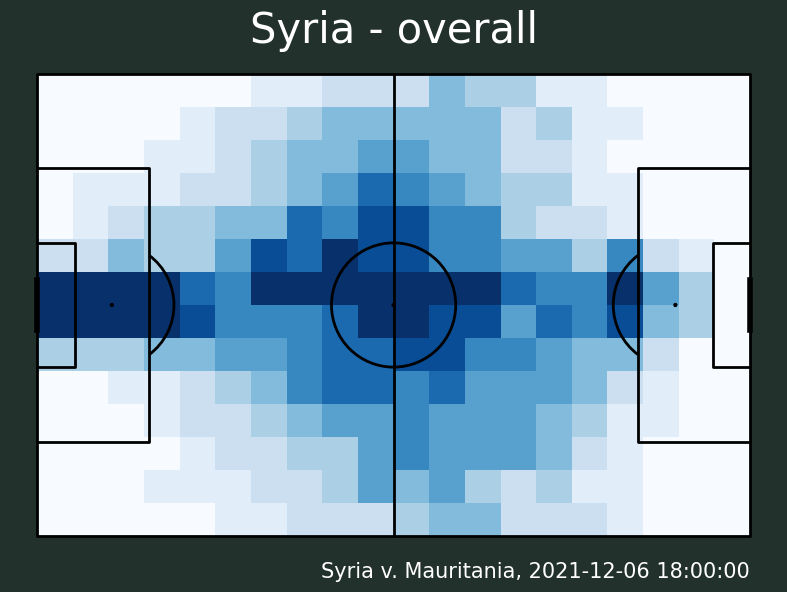

In [39]:
params = source.team_heatmap('home')

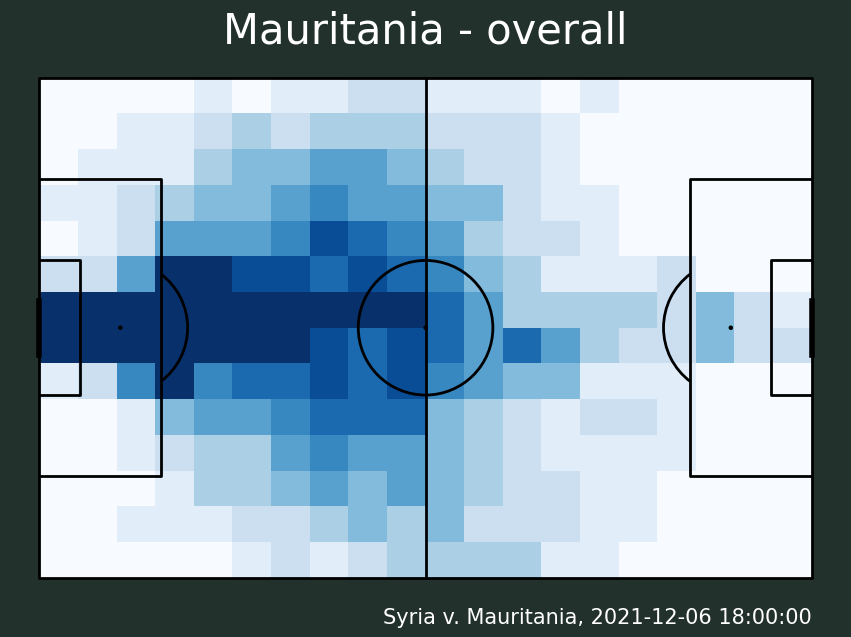

In [59]:
p = source.team_heatmap('Mauritania')

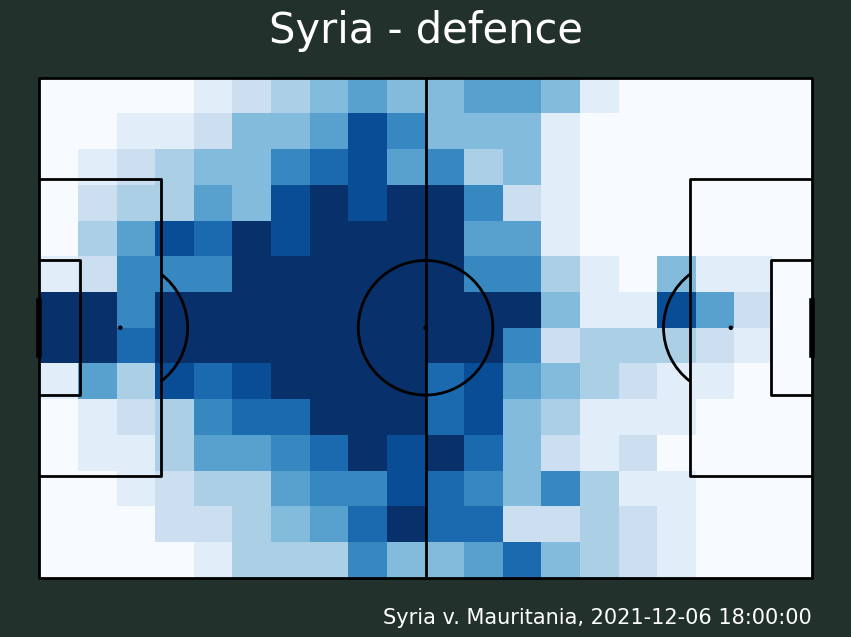

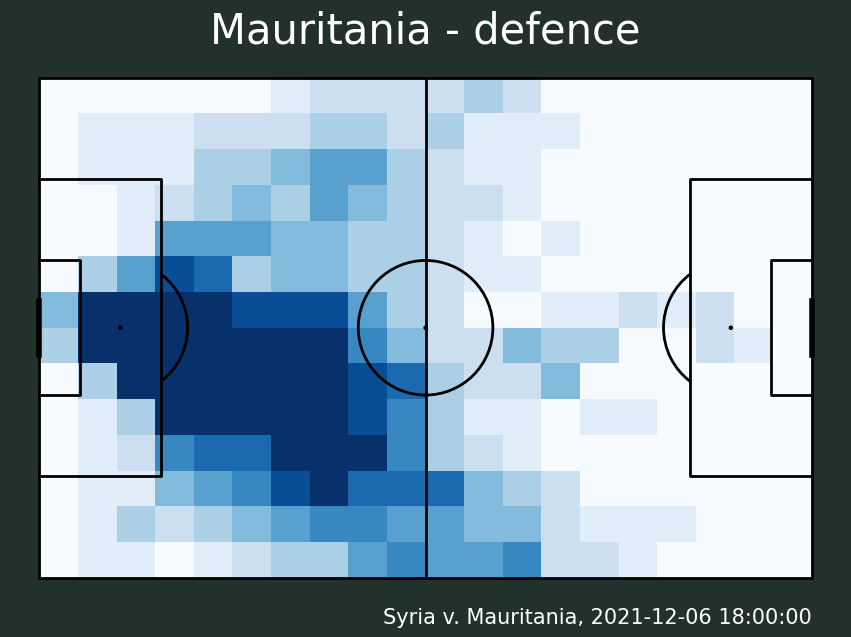

In [60]:
p = source.team_heatmap('Syria', hm_type='defence')
p = source.team_heatmap('Mauritania', hm_type='defence')

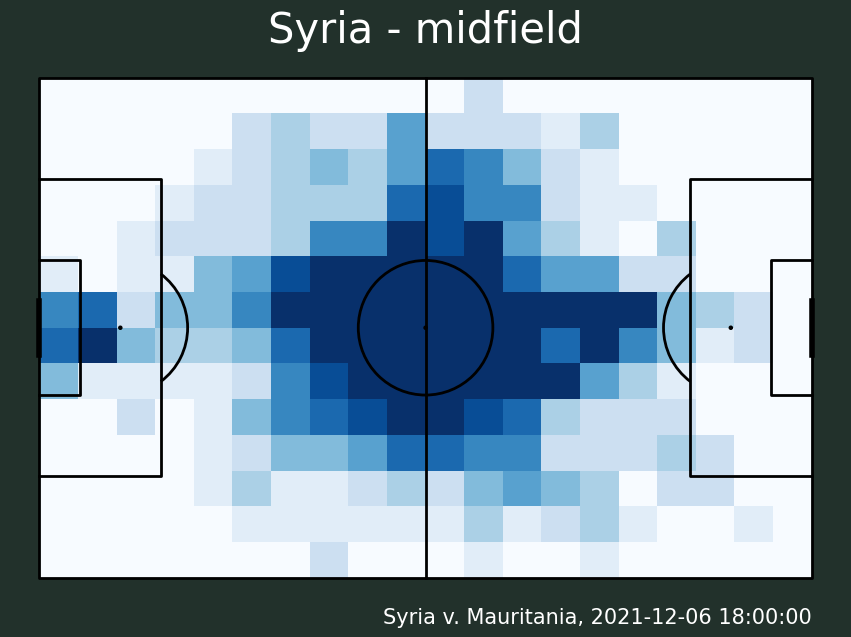

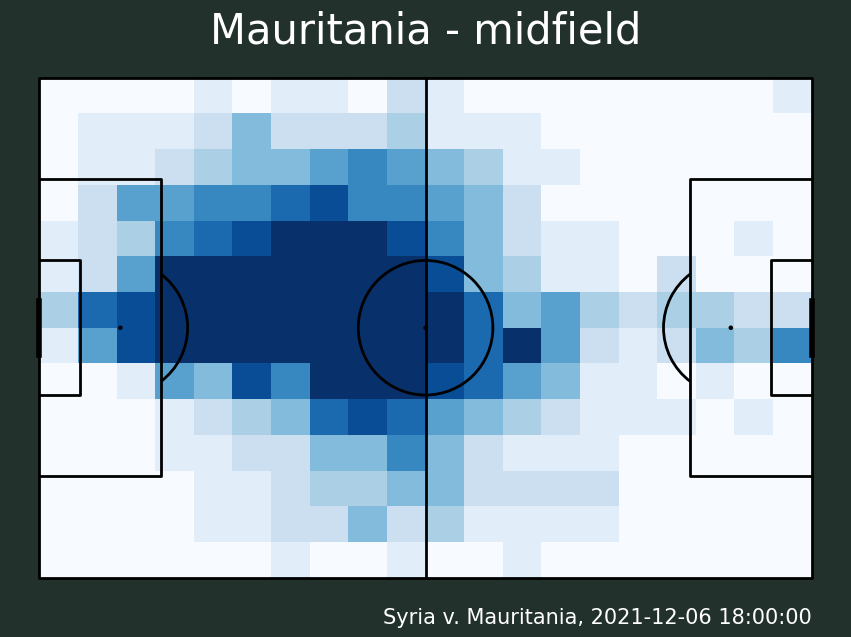

In [61]:
p = source.team_heatmap('Syria', hm_type='midfield')
p = source.team_heatmap('Mauritania', hm_type='midfield')

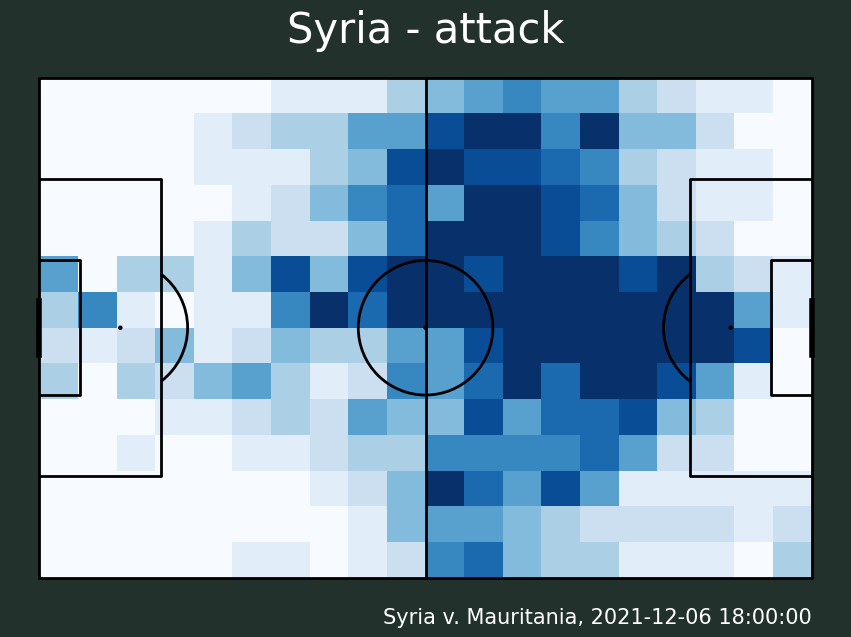

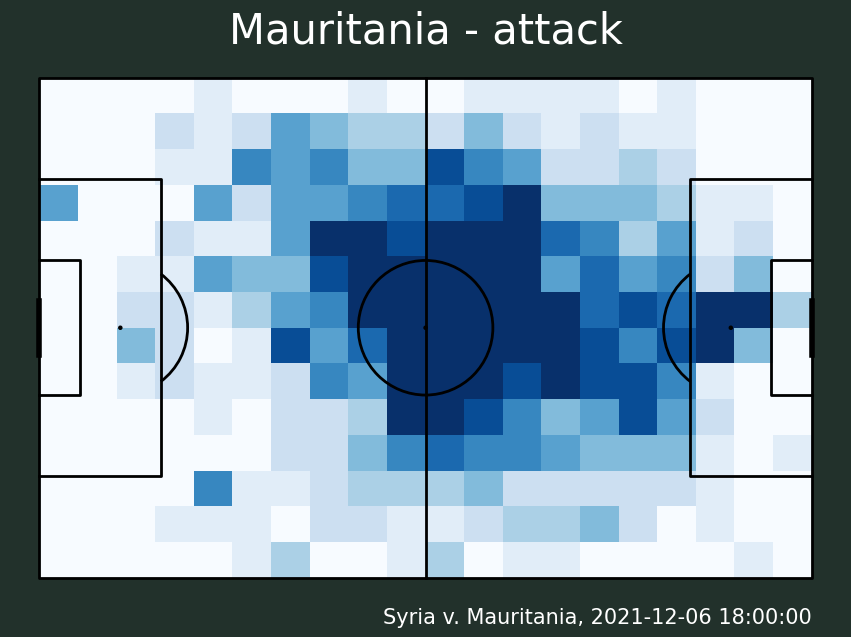

In [62]:
p = source.team_heatmap('Syria', hm_type='attack')
p = source.team_heatmap('Mauritania', hm_type='attack')

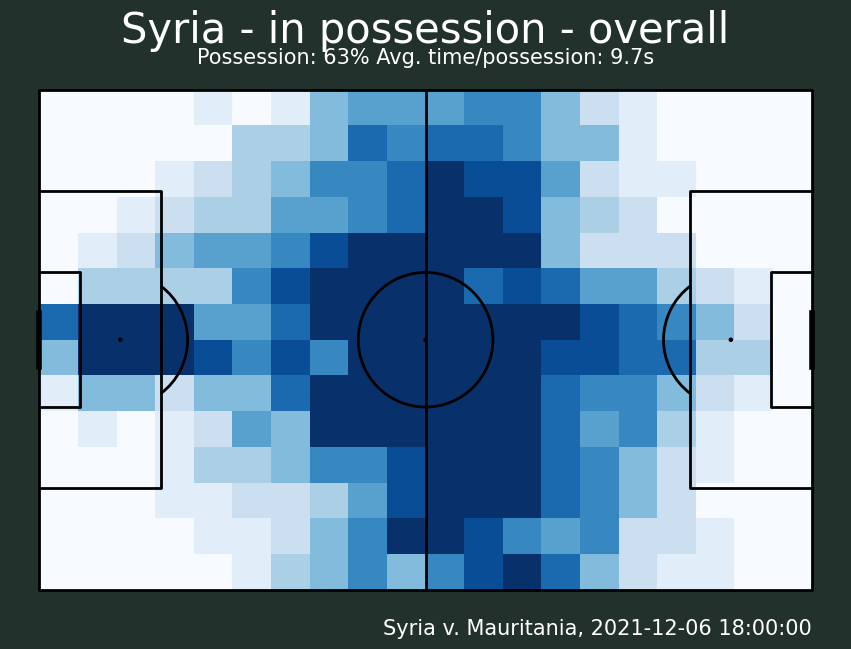

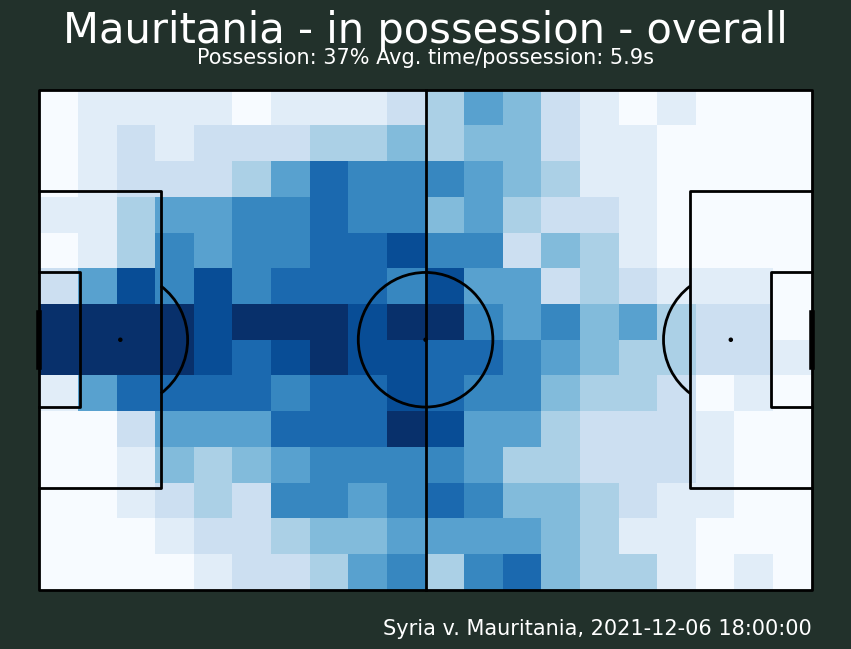

In [63]:
p = source.team_possession_heatmap('Syria', possession='in')
p = source.team_possession_heatmap('Mauritania', possession='in')

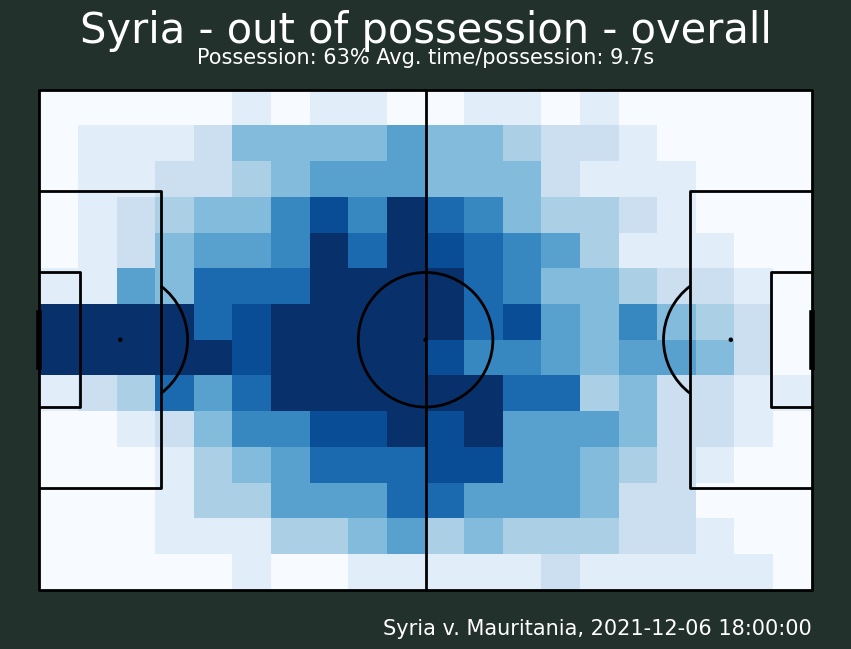

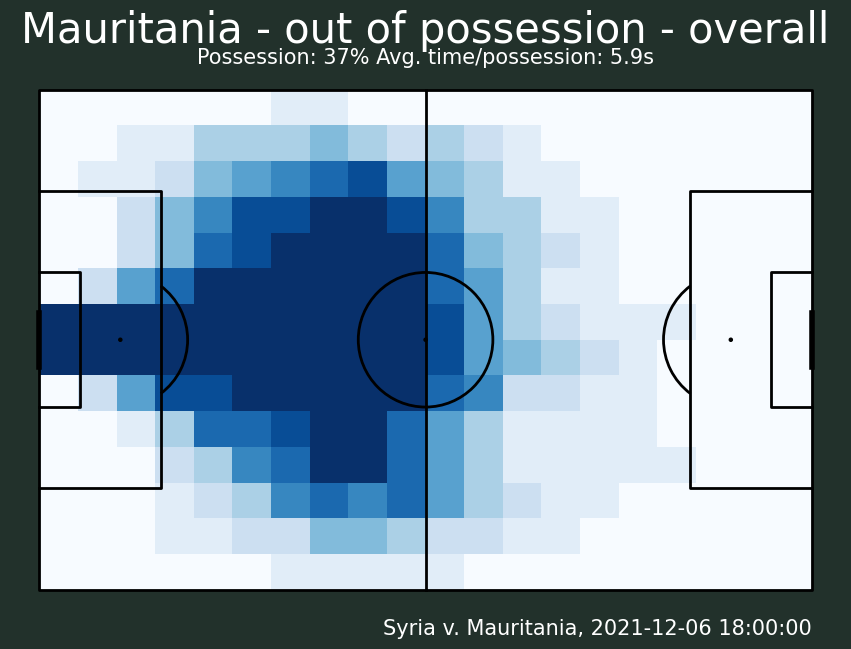

In [64]:
p = source.team_possession_heatmap('Syria', possession='out')
p = source.team_possession_heatmap('Mauritania', possession='out')

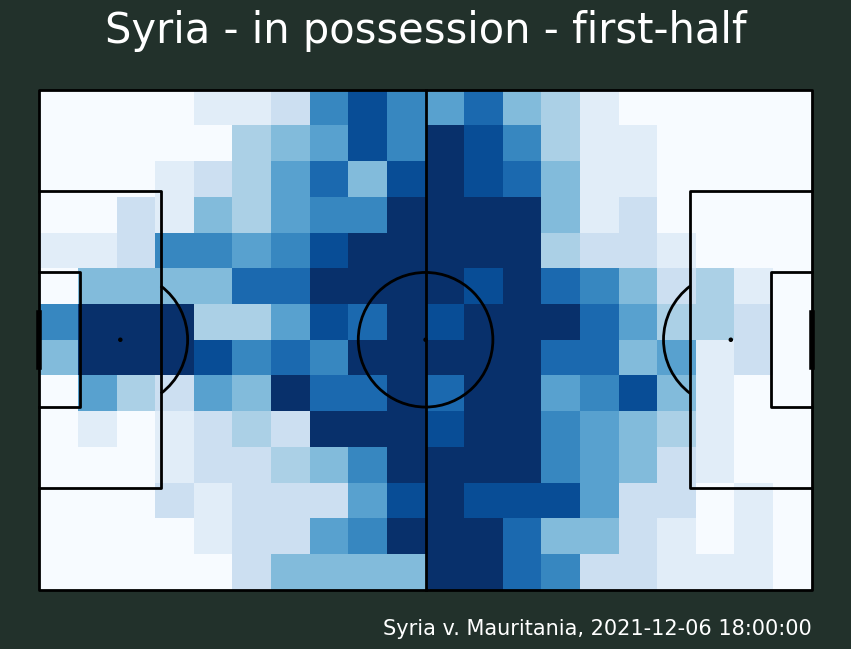

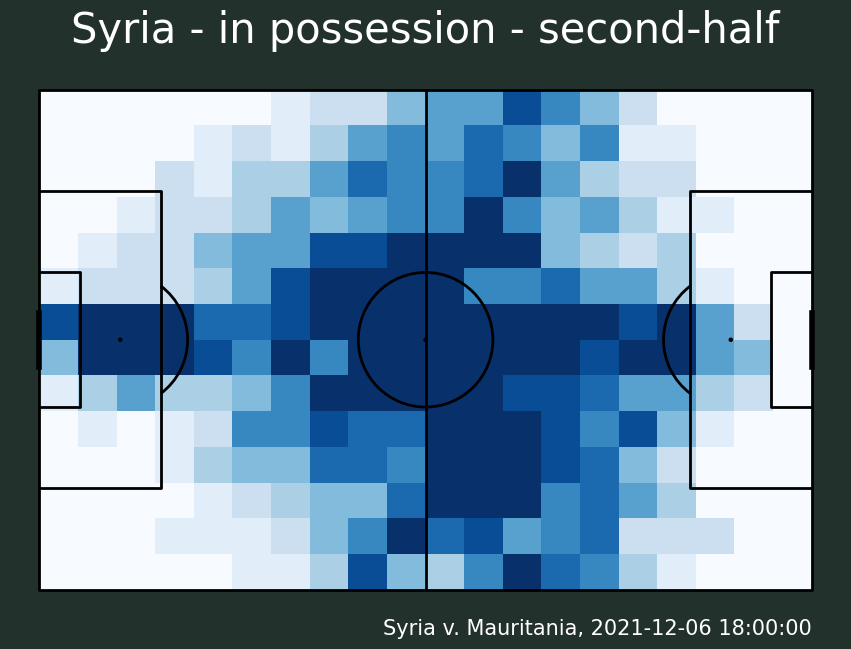

In [65]:
p = source.team_possession_heatmap('Syria', possession='in', hm_type='first-half')
p = source.team_possession_heatmap('Syria', possession='in', hm_type='second-half')

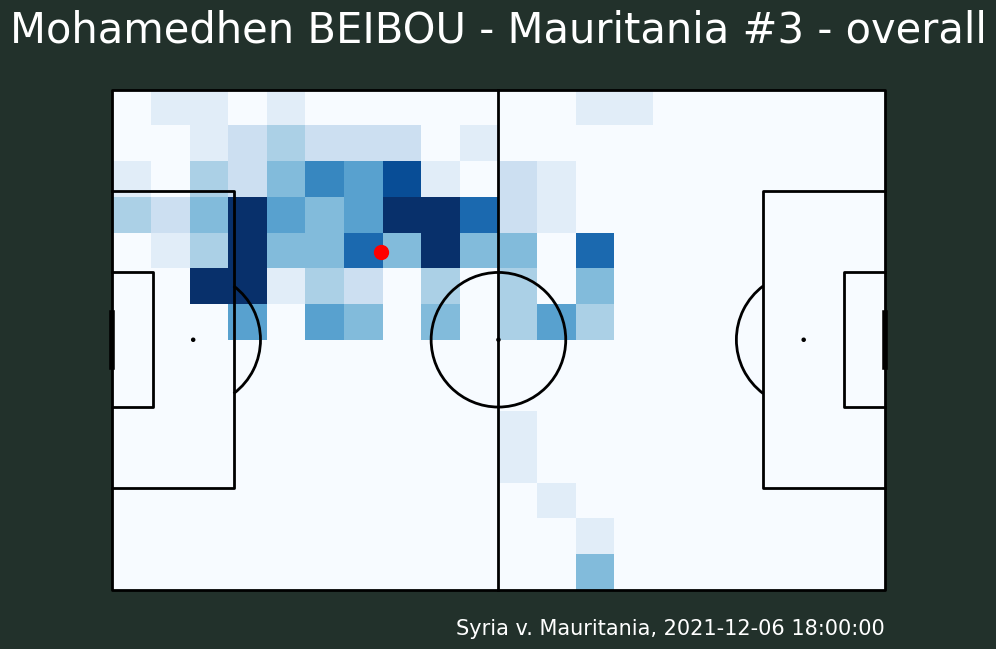

In [66]:
p = source.player_heatmap('431495')

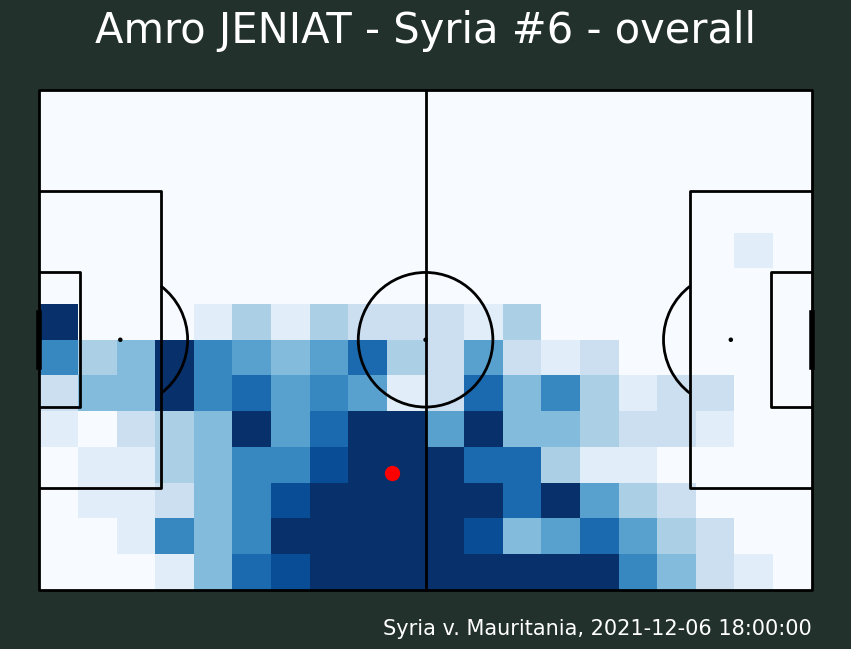

In [69]:
p = source.player_heatmap('Amro JENIAT')

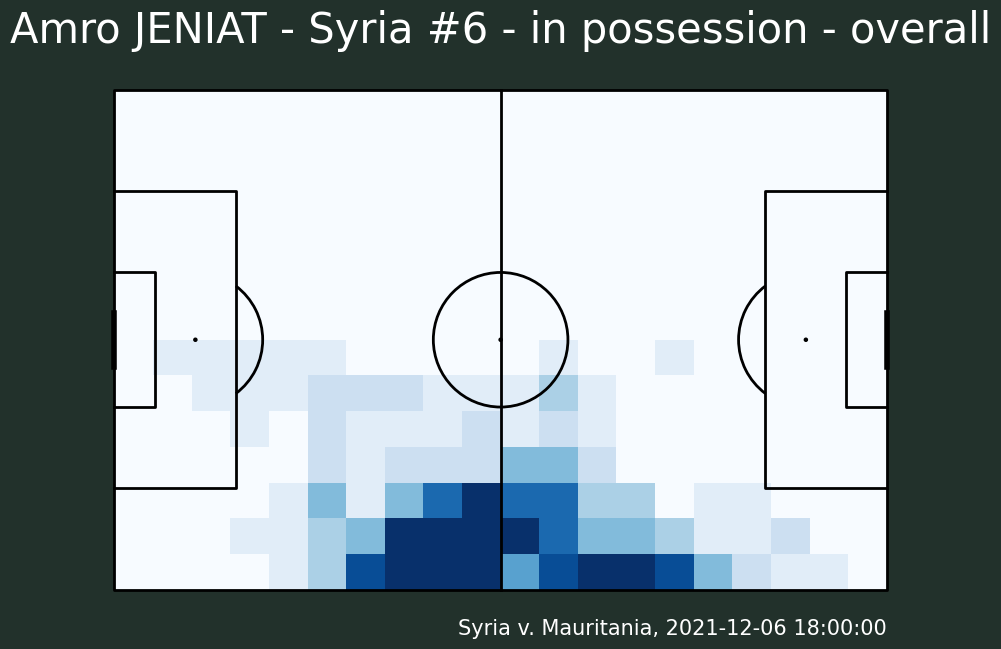

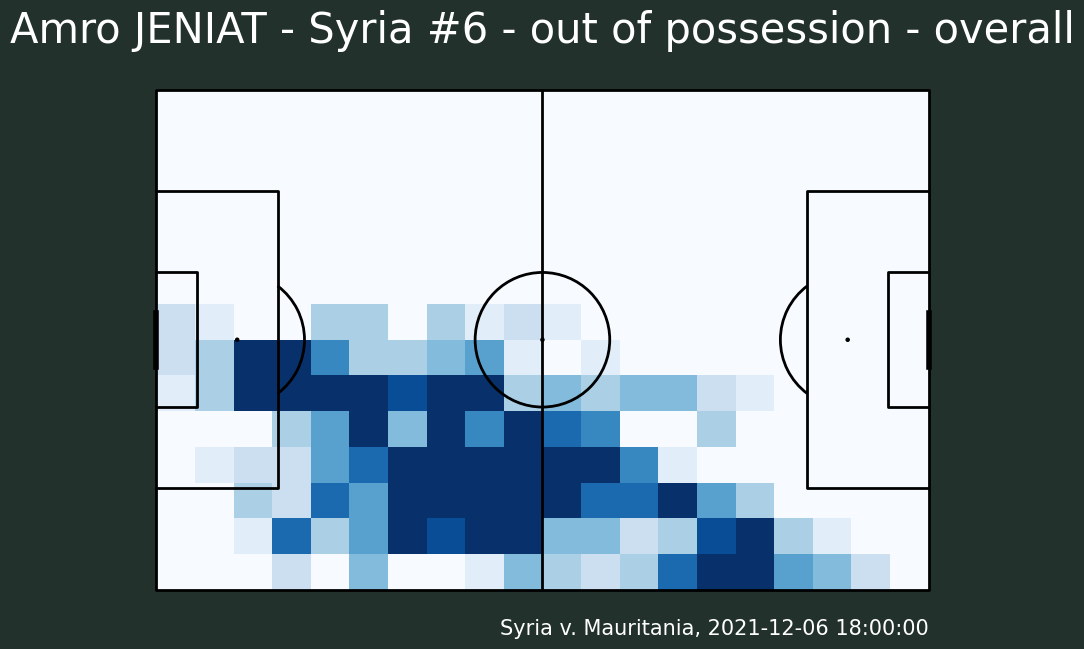

In [68]:
p = source.player_possession_heatmap('Amro JENIAT', possession='in')
p = source.player_possession_heatmap('Amro JENIAT', possession='out')

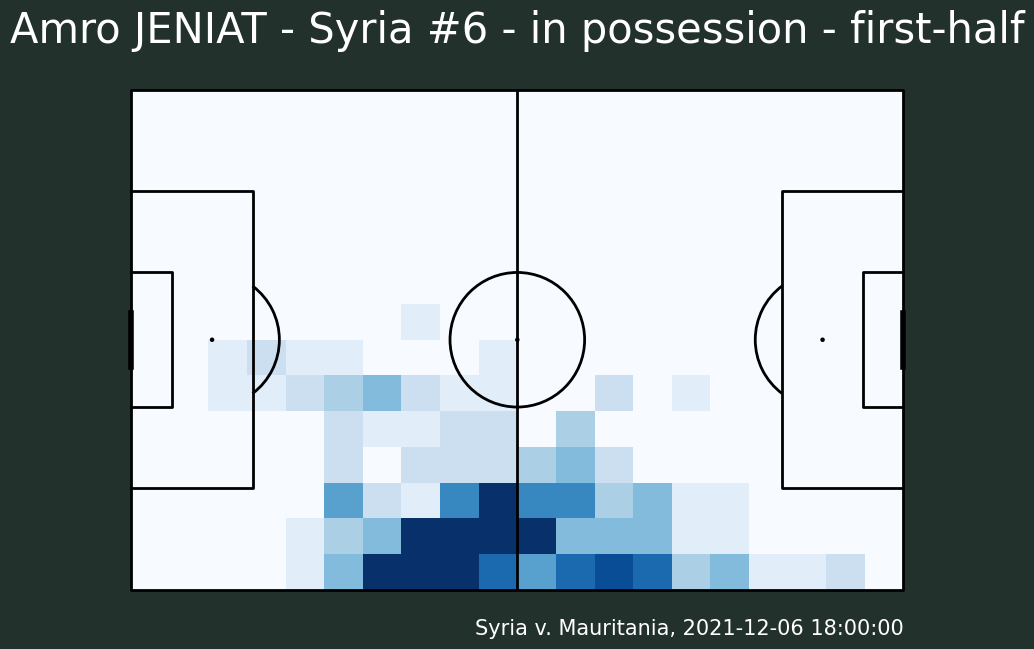

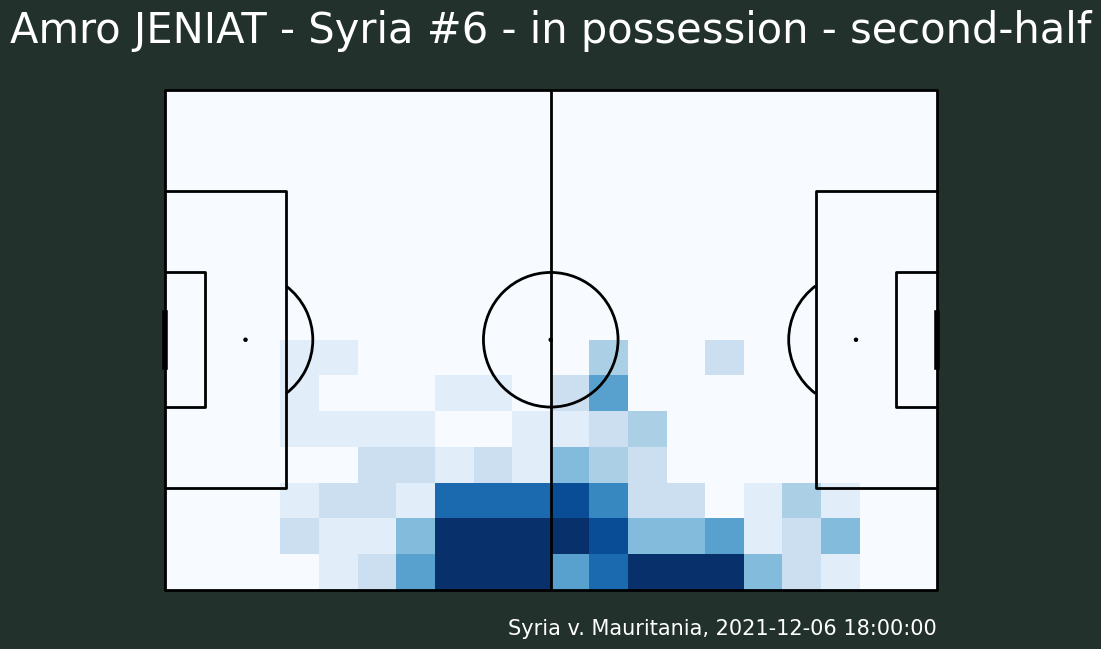

In [72]:
p = source.player_possession_heatmap('Amro JENIAT', possession='in', hm_type='first-half')
p = source.player_possession_heatmap('Amro JENIAT', possession='in', hm_type='second-half')